## Final Project Submission

Please fill out:
* Student name: JARED KIPLETING BORE
* Student pace: PART TIME
* Scheduled project review date/time: 15/12/2022
* Instructor name: NOAH KANDIE
* Blog post URL:


#  Business understanding

   ###    Project overview
   using regression to model and identify features affecting the prices of houses in king county,
   Data loading and EDA,
   Featuring engineering/modeling,
   Analysis and conclusions,
   

  ###    Business problem
Predicting the sale price of properties is always important and often a challenging problem.
We want to build a model that can determine the prices of a given house according to a number of features. We will use a subset of the data for training and the remaining for testing our modeling.

# Data understanding

###  Import the relevant libraries

In [1]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 2.2 Load the data

In [2]:
#Load the csv file
house_data = pd.read_csv('data/kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#check general info
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#summary statistics for the data
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#check general shape i.e no.of rows and column
house_data.shape

(21597, 21)

In [6]:
#checking the columns of the dataset
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# 3.0 Data prepation

### Dealing with missing values

In [7]:
#missing values
house_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
#replacing NaN with 0
house_data=house_data.fillna(0.0)

In [9]:
#rechecking for missing values
house_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Check for placeholders

In [10]:
# unique value counts of sqft_basement
house_data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
935.0         1
374.0         1
3260.0        1
415.0         1
475.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [11]:
#replacing the placeholders
house_data['sqft_basement'] = house_data['sqft_basement'].str.replace('?', '0.0', regex=True)

### Changing data types 

In [12]:
# change data types
for col in ['waterfront', 'yr_renovated', 'view']:
    house_data[col] = house_data[col].apply(int)
house_data['sqft_basement'] = house_data['sqft_basement'].apply(float).apply(int)

In [13]:
#confirming the info
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Dropping irrelevant columns

In [14]:
#drop columns not used as predictors
house_data = house_data.drop(['id', 'date', 'lat', 'long', 'sqft_basement','view', 'zipcode', 'yr_renovated'] , axis=1)
house_data.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,1951,1690,7639


### Relationship between the target variable and the other house features

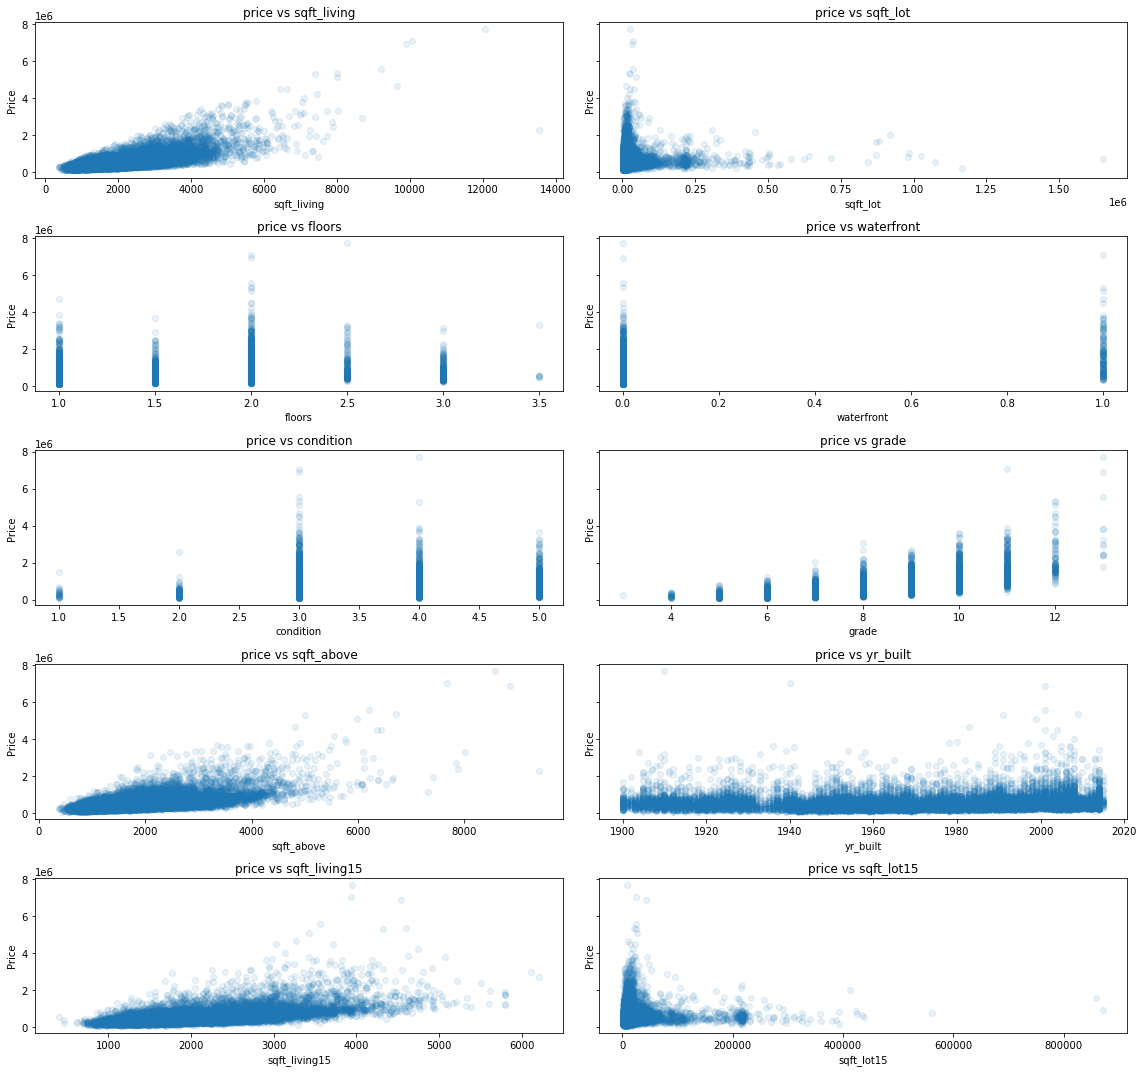

In [15]:
#scatter plot showing relationship between target column and other column
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16,15), sharey=True )

#simultaneously iterate through each column of data and through each of our axes making a plot for each step along the way
for ax, column in zip(axes.flatten(), house_data.columns[3:]):
    ax.scatter(house_data[column], house_data['price'], label=column, alpha=.1)
    ax.set_title(f'price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')
fig.tight_layout()

some of the features like sqft_living has linear relationship with prices
grade, floors,condition and waterfront are categorical columns

In [16]:
# correlation of the house data
house_data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.036056,0.667951,0.605368,0.053953,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.479386,0.155670,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.686668,0.507173,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.876448,0.318152,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.184139,0.052946,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.523989,0.489193,0.280102,-0.010722
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,0.071778,-0.024487,0.083823,0.030658
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.158904,-0.361592,-0.093072,-0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.756073,0.447865,0.713867,0.120981
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,-0.158904,0.756073,1.000000,0.424037,0.731767,0.195077


Price has a high positive correlation with sqft_living, bathrooms, grade, sqft_above, and sqft_living15. Price has a low positive correlation with bedrooms, floors and waterfront.There is no significant relationship between price and sqft_lot, condition and sqft_lot15.

### Checking for multicollinearity

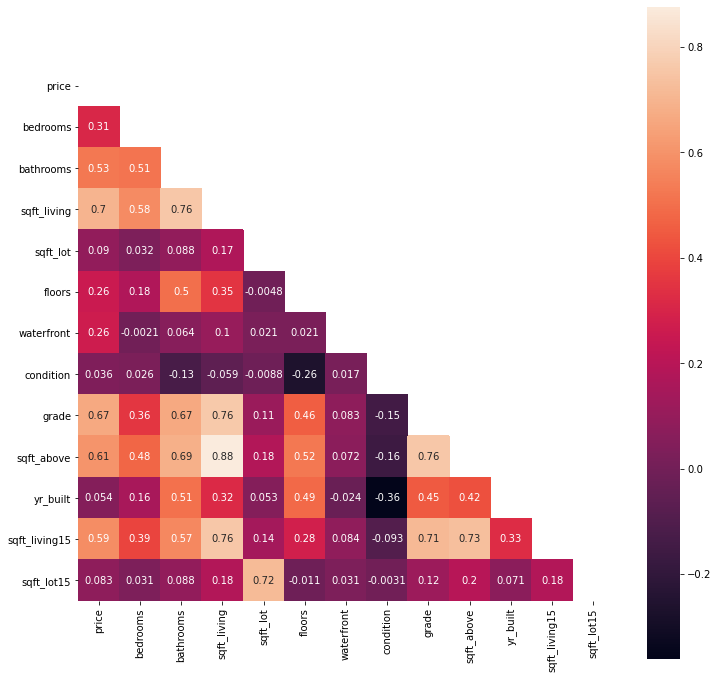

In [17]:
#heatmap showing the correlation of features
fig, ax = plt.subplots(figsize=(12, 12))
corr= house_data.corr()
matrix = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=matrix, annot=True, square=True, ax=ax);

In [18]:
#checking for multcolliniiearity using a correlation threshold of 0.75
df = house_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[(df.cc>.75) & (df.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living, grade)",0.762779
"(sqft_living15, sqft_living)",0.756402
"(grade, sqft_above)",0.756073
"(bathrooms, sqft_living)",0.755758


In [19]:
#removing multicollinearity
house_data = house_data.drop(['bathrooms', 'sqft_above', 'sqft_living15', 'grade'], axis=1)
house_data.head(2)

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,sqft_lot15
0,221900.0,3,1180,5650,1.0,0,3,1955,5650
1,538000.0,3,2570,7242,2.0,0,3,1951,7639


### Split the data to train and test sets

In [20]:
# splitting the data to  train  and test
y = house_data[['price']]
X = house_data.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, test_size=0.22)

In [21]:
X_train.head(2)

,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,sqft_lot15
14916,4,2650,6240,2.0,0,3,2013,6524
5969,2,800,6500,1.0,0,4,1953,7000


### Log transformation

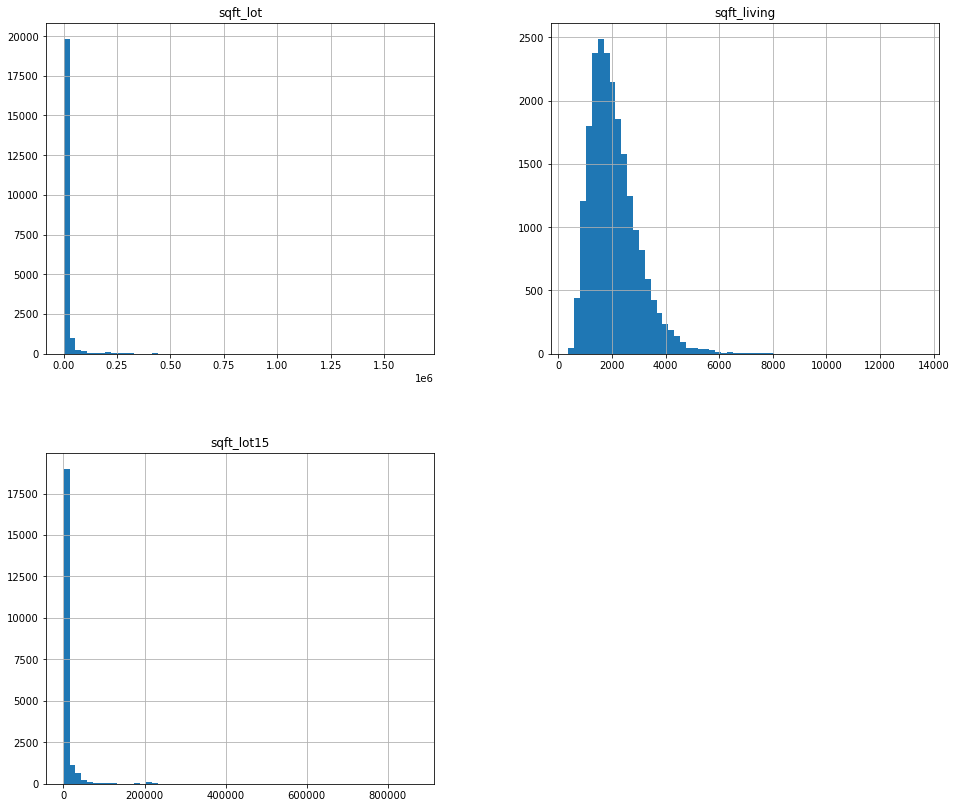

In [22]:
# histogram showing the distribution of continuous data
house_data[['sqft_lot', 'sqft_living', 'sqft_lot15']].hist(figsize=[16,14], bins = 60);

The histograms show non-normal distributions. The distributions are positively skewed. Log transformation is used to normalize the continuous variables.

In [23]:
#log transformation
log_columns = ['sqft_lot',  'sqft_living', 'sqft_lot15']
new_log_columns = [f'{column}_log' for column in X_train[log_columns].columns]

#log transform X train
log_X_train = np.log(X_train[log_columns])
log_X_train.columns =  new_log_columns

#log transform X test
log_X_test = np.log(X_test[log_columns])
log_X_test.columns =  new_log_columns


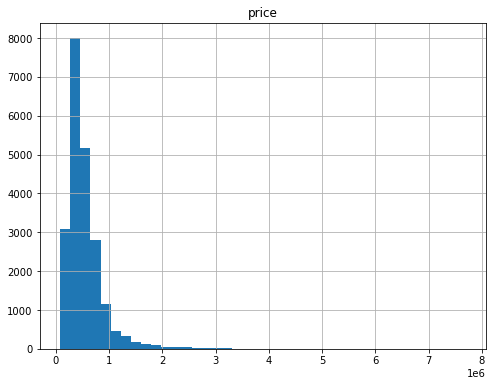

In [24]:
# histogram showing price distribution 
house_data[['price']].hist(figsize=[8,6], bins = 40);

Target variable is positively skewed. Log transformation is thus applied.


In [47]:
#log transform y train
log_y_train = np.log(y_train['price'])
log_y_train.column =  'log_price'

#log transform y test
log_y_test = np.log(y_test['price'])
log_y_test.column =  'log_price'

In [49]:
#creating a data frame
log_y_train = pd.DataFrame((log_y_train), index=y_train.index)
log_y_test = pd.DataFrame((log_y_test), index=y_test.index)

### Scaling 

In [27]:
#scaling x train and x test
scaled_X_train = pd.DataFrame(StandardScaler().fit_transform(log_X_train), 
                               columns=log_X_train.columns, index=X_train.index)
scaled_X_test = pd.DataFrame(StandardScaler().fit_transform(log_X_test), 
                               columns=log_X_test.columns, index=X_test.index)


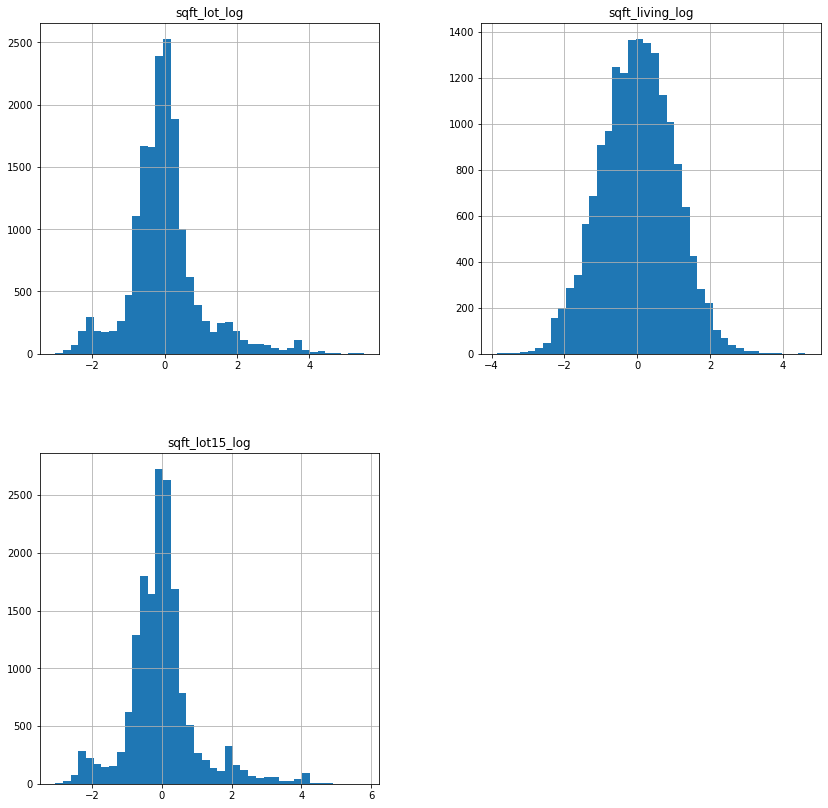

In [28]:
# distribution of continuous data after log transformation and scaling
scaled_X_train[new_log_columns].hist(figsize=[14,14], bins = 40);

Continous data has been normalised after log transformation

In [29]:
# scaling y train and y test
scaled_y_train = pd.DataFrame(StandardScaler().fit_transform(log_y_train), 
                               columns=log_y_train.columns, index=y_train.index)
scaled_y_test = pd.DataFrame(StandardScaler().fit_transform(log_y_test), 
                               columns=log_y_test.columns, index=y_test.index)

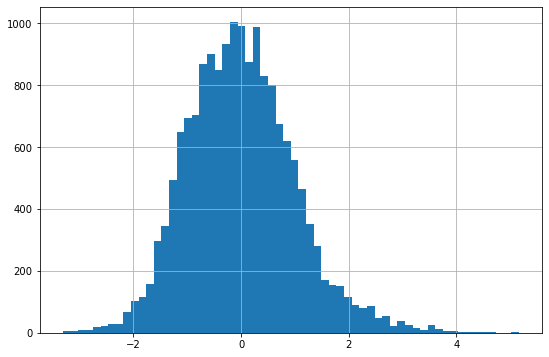

In [30]:
# distribution of price after log transformation and scaling
scaled_y_train['price'].hist(figsize=[9,6], bins = 60);

The distribution is now normalised after scaling

In [31]:
#replacing continous columns with scaled columns
last_X_train = pd.concat([X_train.drop(log_columns, axis=1), scaled_X_train], axis=1)
last_X_test = pd.concat([X_test.drop(log_columns, axis=1), scaled_X_test], axis=1)

In [32]:
last_X_train.head(3)

,bedrooms,floors,waterfront,condition,yr_built,sqft_lot_log,sqft_living_log,sqft_lot15_log
14916,4,2.0,0,3,2013,-0.279363,0.778220,-0.221226
5969,2,1.0,0,4,1953,-0.234155,-2.044000,-0.134701
15863,4,1.0,0,4,1964,0.214876,-0.338186,0.317213


# Modeling

### Model using the most correlated feature

In [33]:
# model using price and sqft_living_log
model1 = sm.OLS(scaled_y_train, sm.add_constant(last_X_train[['sqft_living_log']])).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                 1.413e+04
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:46:23   Log-Likelihood:                -18772.
No. Observations:               16845   AIC:                         3.755e+04
Df Residuals:                   16843   BIC:                         3.756e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9.489e-16      0.006  -1.67e-13      1.000      -0.011       0.011
sqft_living_log     0.6754      0.006    118.858      0.000       0.664       0.687
==============================================================================
Omnibus:                       95.408   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.237
Skew:                           0.142   Prob(JB):                     6.91e-20
Kurtosis:                       2.789   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# MSE using the first model
model1 = LinearRegression()
model1.fit(last_X_train[['sqft_living_log']], scaled_y_train)
y_hat_train = model1.predict(last_X_train[['sqft_living_log']])
y_hat_test = model1.predict(last_X_test[['sqft_living_log']])
train_mse = mean_squared_error(scaled_y_train, y_hat_train)
test_mse = mean_squared_error(scaled_y_test, y_hat_test)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Train MSE: 0.5438461502541337
Test MSE: 0.547531136434502


this model shows there is underfitting , the difference between train and test MSE is small

### Model using all features

In [36]:
# Model using all features
model2 = sm.OLS(scaled_y_train, sm.add_constant(last_X_train)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     2420.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:47:22   Log-Likelihood:                -17455.
No. Observations:               16845   AIC:                         3.493e+04
Df Residuals:                   16836   BIC:                         3.500e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              15.9259      0.443     35.990      0.000      15.059      16.793
bedrooms           -0.1461      0.007    -20.008      0.000      -0.160      -0.132
floors              0.2534      0.013     19.993      0.000       0.229       0.278
waterfront          1.2805      0.065     19.777      0.000       1.154       1.407
condition           0.0542      0.009      6.163      0.000       0.037       0.071
yr_built           -0.0081      0.000    -36.635      0.000      -0.009      -0.008
sqft_lot_log       -0.0657      0.014     -4.795      0.000      -0.093      -0.039
sqft_living_log     0.8114      0.008    102.151      0.000       0.796       0.827
sqft_lot15_log     -0.0190      0.013     -1.406      0.160      -0.045       0.007
==============================================================================
Omnibus:                       26.729   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.503
Skew:                           0.028   Prob(JB):                     1.44e-07
Kurtosis:                       3.204   Cond. No.                     1.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# MSE for model 2 under all features
model2 = LinearRegression()
model2.fit(last_X_train, scaled_y_train)
y_hat_train = model2.predict(last_X_train)
y_hat_test = model2.predict(last_X_test)
train_mse = mean_squared_error(scaled_y_train, y_hat_train)
test_mse = mean_squared_error(scaled_y_test, y_hat_test)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Train MSE: 0.4651007699758598
Test MSE: 0.4777806775224847


this model perfomes better on test than train

### Using p-values to select features

From the summary of the model above, all features have a p-value < 0.05 except sqft_lot15_log. sqft_lot15_log will thus not be used in this model.

In [38]:
# model using significant features
significant_features = ['bedrooms', 'floors', 'sqft_living_log', 'yr_built', 'waterfront', 'condition',
                        'sqft_lot_log']
significant_X_train = last_X_train[significant_features]
significant_model = sm.OLS(scaled_y_train, sm.add_constant(significant_X_train)).fit()
significant_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     2766.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:47:35   Log-Likelihood:                -17456.
No. Observations:               16845   AIC:                         3.493e+04
Df Residuals:                   16837   BIC:                         3.499e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              15.9850      0.441     36.286      0.000      15.122      16.848
bedrooms           -0.1457      0.007    -19.970      0.000      -0.160      -0.131
floors              0.2545      0.013     20.109      0.000       0.230       0.279
sqft_living_log     0.8112      0.008    102.140      0.000       0.796       0.827
yr_built           -0.0082      0.000    -36.944      0.000      -0.009      -0.008
waterfront          1.2763      0.065     19.733      0.000       1.150       1.403
condition           0.0535      0.009      6.092      0.000       0.036       0.071
sqft_lot_log       -0.0829      0.006    -13.578      0.000      -0.095      -0.071
==============================================================================
Omnibus:                       26.728   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.502
Skew:                           0.028   Prob(JB):                     1.44e-07
Kurtosis:                       3.204   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
#using significant model to get MSE
significant_model = LinearRegression()
significant_model.fit(last_X_train[significant_features], scaled_y_train)
y_hat_train = significant_model.predict(last_X_train[significant_features])
y_hat_test = significant_model.predict(last_X_test[significant_features])
train_mse = mean_squared_error(scaled_y_train, y_hat_train)
test_mse = mean_squared_error(scaled_y_test, y_hat_test)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Train MSE: 0.4651553910048739
Test MSE: 0.4776818230669537


### Recursive feature elimination

In [40]:
# selecting 3 best fetures
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=3)
selector = selector.fit(last_X_train, scaled_y_train)
selector.support_ 

array([False,  True,  True, False, False, False,  True, False])

In [41]:
#model using the three selected features
columns_selector = last_X_train.columns[selector.support_ ]
X_train_selector = last_X_train[columns_selector]
sm.OLS(scaled_y_train, sm.add_constant(X_train_selector)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     5069.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:47:38   Log-Likelihood:                -18483.
No. Observations:               16845   AIC:                         3.697e+04
Df Residuals:                   16841   BIC:                         3.700e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2038      0.018    -11.542      0.000      -0.238      -0.169
floors              0.1297      0.011     11.582      0.000       0.108       0.152
waterfront          1.4683      0.068     21.467      0.000       1.334       1.602
sqft_living_log     0.6388      0.006    105.682      0.000       0.627       0.651
==============================================================================
Omnibus:                       91.524   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.351
Skew:                           0.116   Prob(JB):                     5.88e-18
Kurtosis:                       2.756   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# intercept and coefficient of the model
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[[0.12971653 1.46831969 0.63884866]]
[-0.20384182]


### Assumption on linearity
model2 is my best performing model

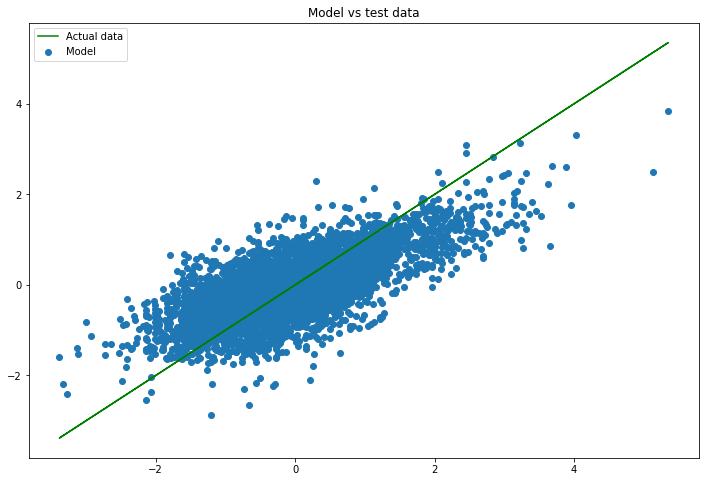

In [52]:
#linearity assumption scatter and line plot
y_hat_test = model2.predict(last_X_test)
fig, ax = plt.subplots(  = (12,8))

ax.scatter(scaled_y_test, y_hat_test, label='Model')
ax.plot(scaled_y_test['price'], scaled_y_test['price'], label='Actual data',  color='green')
ax.set_title('Model vs test data')
ax.legend();

The model follows the linearity

### Assumption on normality

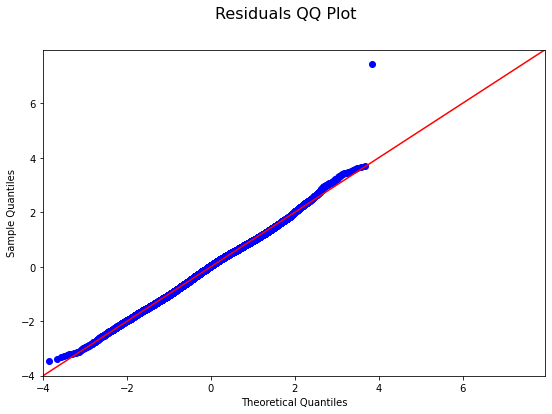

In [54]:
# assumption on normalities
fig, ax = plt.subplots(figsize=(9,6))
model2 = sm.OLS(scaled_y_train, sm.add_constant(last_X_train)).fit()
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=ax)
fig.suptitle('Residuals QQ Plot', fontsize=16);

Normality of residuals are okay

### Assumption on homoscedascity

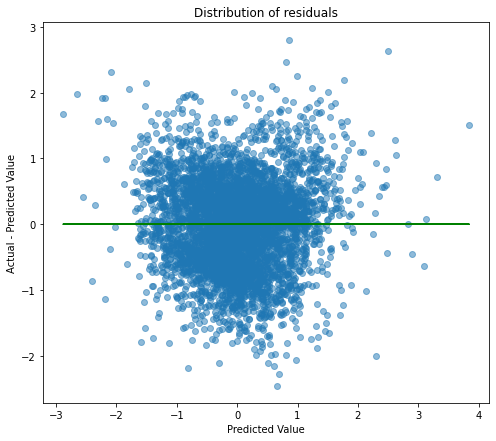

In [59]:
#plot showing homoscedascity
fig, ax = plt.subplots(figsize=(8,7))
residual = (scaled_y_test - y_hat_test)
model2 = sm.OLS(scaled_y_train, sm.add_constant(last_X_train)).fit()
ax.scatter(y_hat_test, residual, alpha=0.5)
ax.plot(y_hat_test, [0 for i in range(len(last_X_test))], color='green')
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");
ax.set_title('Distribution of residuals');

Homoscedascity assumption is not violated

# Conclusion
The model is best suit for predicting bcause it follows the linearity and normality and it doesnt violate homoscedascity
This project was driven by the need to understand how different features influence the price of houses. We investigated the price of houses with varied features. We found that as the amenities increased the price also increased. We observed houses in King County were priced high for providing people with special amenities like the waterfront.


 # Recommendations
 The top features to determine the value of houses are:

1. Square footage of the house 

The square footage of the living area is the second most important feature when determining the sales price. The larger space of living area, the higher sales price of the house. 

2. Square footage of lot and its nearest 15 neighbors

The square footage of the lot is another key feature when determining the value of house. Based on our model, the larger size of the lot will lead to a higher sales price. Home buyers often prefer properties that allow for easy indoor-outdoor living and provide level areas for children, pets and gardening.

However, interestingly, the large size of the lot for its nearest 15 neighbors will draw down the sales price. It might because the property tax is assessed on the lot size of the house and its neighbors. Too large lotsize might lead to higher property tax.

4. Waterfront: whether the house has a view to a waterfront

The houses with waterfront view have a higher sales price than those without waterfront view.